In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D # 3d plot

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
pd.set_option('display.max_columns', None)
df.head(7)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0


In [3]:
df_info = pd.DataFrame(columns=['Column', 'Null', 'Dtype', 'Cnt_Unique'])


for i in range(0, len(df.columns)):
    df_info.loc[i] = [
        df.columns[i],
        df[df.columns[i]].isnull().sum(),
        df[df.columns[i]].dtypes,
        df[df.columns[i]].nunique()
    ]

df_info

,Column,Null,Dtype,Cnt_Unique
0,ID,0,int64,2240
1,Year_Birth,0,int64,59
2,Education,0,object,5
3,Marital_Status,0,object,8
4,Income,24,float64,1974
5,Kidhome,0,int64,3
6,Teenhome,0,int64,3
7,Dt_Customer,0,object,663
8,Recency,0,int64,100
9,MntWines,0,int64,776


Customer's Info

    ID
    Year_Birth
    Education
    Marital_Status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if customer complained in the last 2 years, 0 otherwise
    
Products
    
    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years

Promotion

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
    
Place

    NumWebPurchases: Number of purchases made through the company’s web site
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitMonth: Number of visits to company’s web site in the last month

#### Data Cleaning 

Year Birth

In [4]:
#add new column for age

getdate = date.today() #current year
df['Age'] = getdate.year - df['Year_Birth']

Education

In [5]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [6]:
#Make 3 categories of education, graduation, post graduation and basic

df.loc[(df['Education'] == 'PhD') | (df['Education'] == 'Master') | 
       (df['Education'] == '2n Cycle'), 'Education'] = 'Post Graduation'

Marital Status

In [7]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [8]:
#Just make 2 categories married and alone

df.loc[(df['Marital_Status'] == 'Together'), 'Marital_Status'] = 'Married'
df.loc[(df['Marital_Status'] != 'Married'), 'Marital_Status'] = 'Alone'

Kids and Teen

In [9]:
#add new column to see number of children in the house and children flag

df['Children'] = df['Kidhome'] + df['Teenhome']
df['IsParent'] = np.where(df['Children'] > 0, 1, 0)

Dt_Customer

In [10]:
#change dtype of Dt_Customer field

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [11]:
df['Dt_Customer'].dtypes

dtype('<M8[ns]')

Income

In [12]:
#see shape of data before dropna
df.shape

(2240, 32)

In [13]:
#drop null value from income

df.dropna(inplace = True)
df.shape

(2216, 32)

Make new column count purchase all product in the last 2 years

In [14]:
df['CntMnt'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']
+ df['MntSweetProducts'] + df['MntGoldProds']

0       176
1         7
2        63
3         8
4        42
       ... 
2235    365
2236      8
2237     36
2238     91
2239     22
Length: 2216, dtype: int64

In [15]:
#make new column to see is there any purchase in the last 2 years

# df['IsPurchase'] = np.where(df['CntMnt'] > 0, 1, 0)

In [16]:
#drop Dt_Customer, Z_revenue, Z_CostContact
print('Columns number before drop column: {}'.format(df.shape[1]))

df.drop(['Dt_Customer', 'Z_Revenue', 'Z_CostContact'], axis=1, inplace=True)
print('Columns number after drop column: {}'.format(df.shape[1]))

Columns number before drop column: 33
Columns number after drop column: 30


In [17]:
df_info = pd.DataFrame(columns=['Column', 'Null', 'Dtype', 'Cnt_Unique'])


for i in range(0, len(df.columns)):
    df_info.loc[i] = [
        df.columns[i],
        df[df.columns[i]].isnull().sum(),
        df[df.columns[i]].dtypes,
        df[df.columns[i]].nunique()
    ]

print('Count rows: {}'.format(df.shape[0]))
df_info

Count rows: 2216


,Column,Null,Dtype,Cnt_Unique
0,ID,0,int64,2216
1,Year_Birth,0,int64,59
2,Education,0,object,3
3,Marital_Status,0,object,2
4,Income,0,float64,1974
5,Kidhome,0,int64,3
6,Teenhome,0,int64,3
7,Recency,0,int64,100
8,MntWines,0,int64,776
9,MntFruits,0,int64,158


### EDA 

<function matplotlib.pyplot.show(close=None, block=None)>

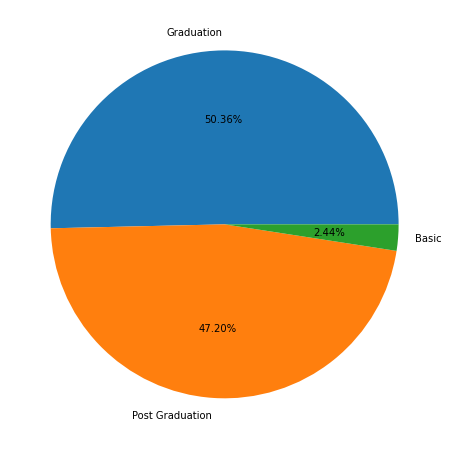

In [18]:
plt.figure(figsize=(12,8))
plt.pie(x = df['Education'].value_counts(), labels = df['Education'].value_counts().index, autopct = '%1.2f%%', wedgeprops = {'linewidth': 3})
plt.show

Text(0.5, 1.0, 'Married')

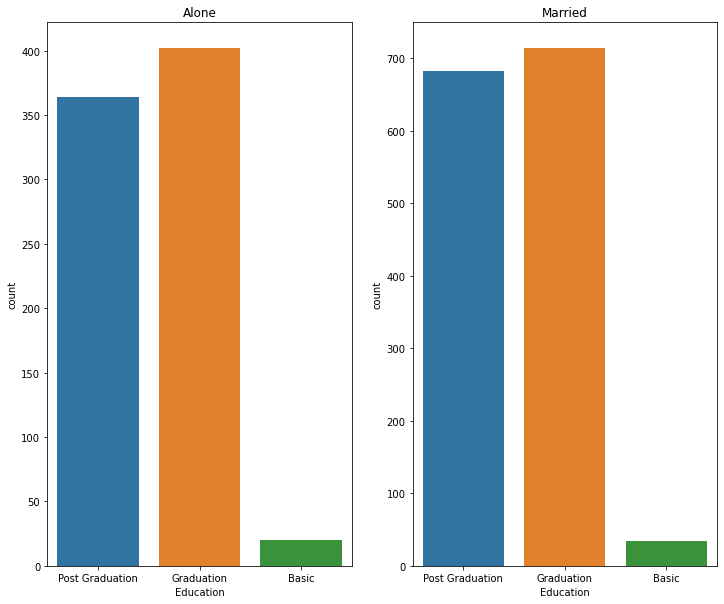

In [19]:
fig, axes = plt.subplots(1,2, figsize=(12,10))

sns.countplot(ax=axes[0], x='Education', data=df[df['Marital_Status']=='Alone'], order=['Post Graduation', 'Graduation', 'Basic'])
axes[0].set_title('Alone')

sns.countplot(ax=axes[1], x='Education', data=df[df['Marital_Status']=='Married'], order=['Post Graduation', 'Graduation', 'Basic'])
axes[1].set_title('Married')

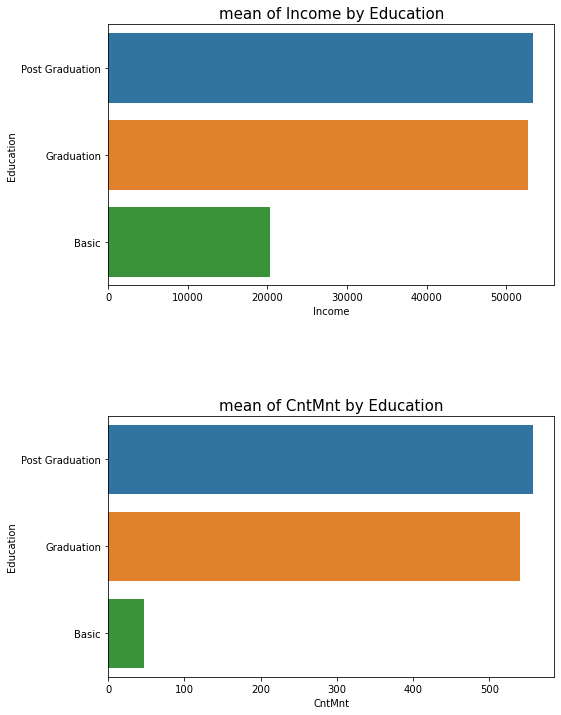

In [20]:
to_barplot = ['Income', 'CntMnt']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,12))
axes = axes.flatten()

for col, ax in zip(to_barplot, axes):
    ax = sns.barplot(data = df, y = 'Education', x = col, ax = ax, ci = None, order=['Post Graduation', 'Graduation', 'Basic'])
    ax.set_title(f'mean of {col} by Education', fontsize = 15)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
        
plt.show()

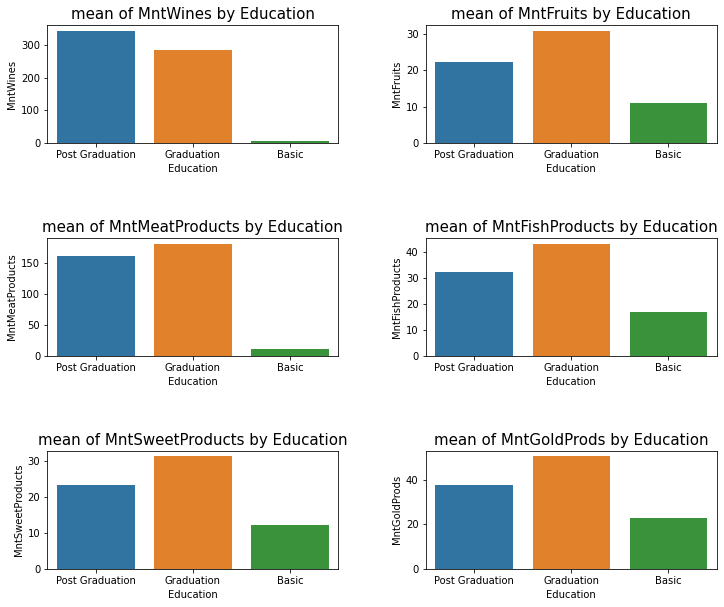

In [21]:
to_barplot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
axes = axes.flatten()

for col, ax in zip(to_barplot, axes):
    ax = sns.barplot(data = df, x = 'Education', y = col, ax = ax, ci = None, order=['Post Graduation', 'Graduation', 'Basic'])
    ax.set_title(f'mean of {col} by Education', fontsize = 15)
    plt.subplots_adjust(hspace = 0.8, wspace = 0.3)
        
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

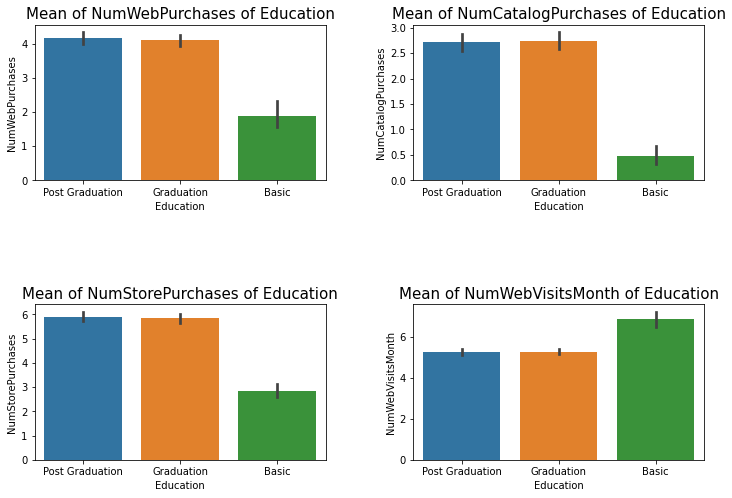

In [22]:
to_barplot = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.flatten()

for col, ax in zip(to_barplot, axes):
    ax = sns.barplot(data=df, x='Education', y=col, ax=ax, order=['Post Graduation', 'Graduation', 'Basic'])
    ax.set_title(f'Mean of {col} of Education', fontsize=15)
    plt.subplots_adjust(wspace=0.3, hspace=0.8)
#     axes[-1].axis('off')
    
plt.show

[Text(0.5, 1.0, 'Num Purchases by Education')]

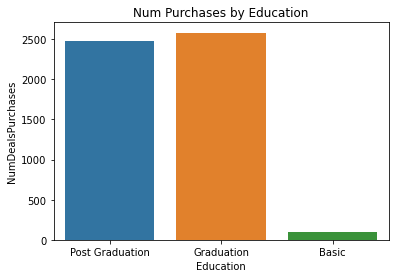

In [23]:
num_deals = pd.DataFrame(df.groupby('Education')['NumDealsPurchases'].sum())
num_deals = num_deals.reset_index()

sns.barplot(x='Education', y='NumDealsPurchases', data=num_deals, order=['Post Graduation', 'Graduation', 'Basic']).set(title='Num Purchases by Education')

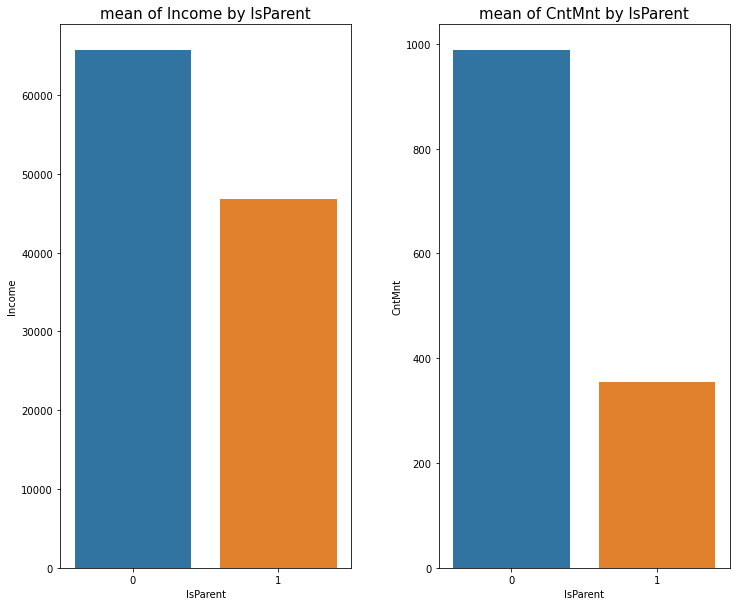

In [24]:
to_barplot = ['Income', 'CntMnt']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10))
axes = axes.flatten()

for col, ax in zip(to_barplot, axes):
    ax = sns.barplot(data = df, x = 'IsParent', y = col, ax = ax, ci = None)
    ax.set_title(f'mean of {col} by IsParent', fontsize = 15)
    plt.subplots_adjust(hspace = 0.8, wspace = 0.3)
        
plt.show()

<AxesSubplot:xlabel='IsParent', ylabel='count'>

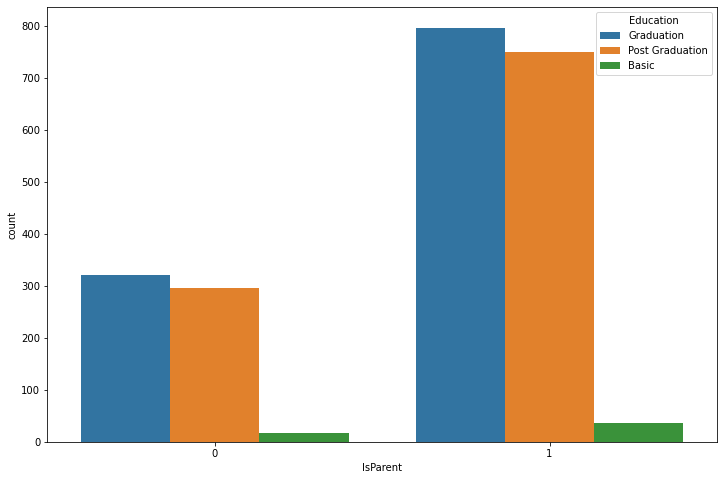

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='IsParent', hue='Education')

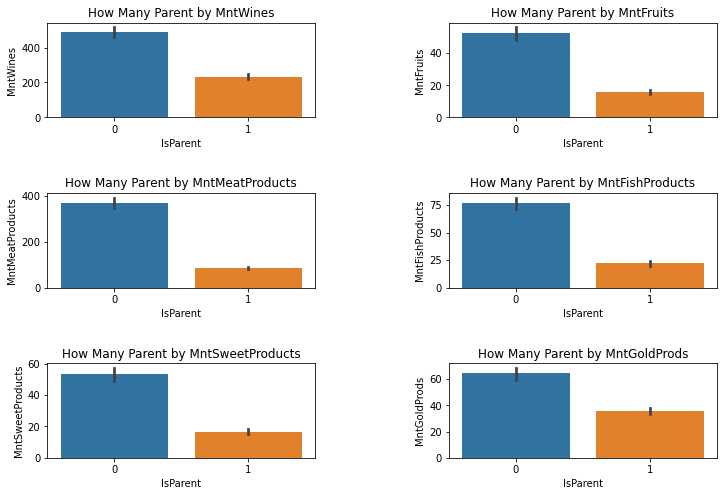

In [26]:
to_barplot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, axes = plt.subplots(3, 2, figsize=(12,8))
axes = axes.flatten()

for col, ax in zip(to_barplot, axes):
    ax = sns.barplot(data=df , x='IsParent', y=col, ax=ax)
    ax.set_title(f'How Many Parent by {col}')
    plt.subplots_adjust(hspace=0.8, wspace=0.5)
    
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

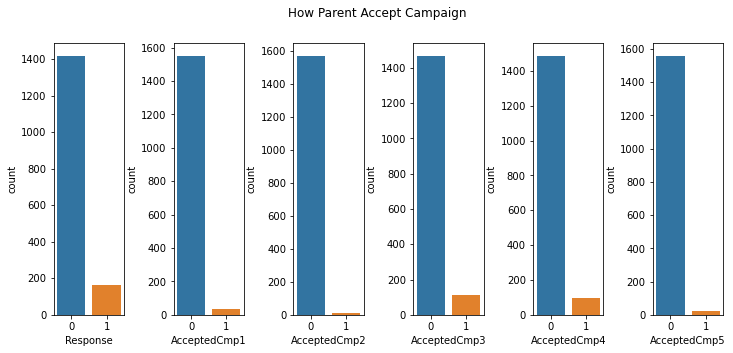

In [27]:
#Compare how parent accept campaign
fig, axes = plt.subplots(1, 6, figsize=(12,5))
fig.suptitle('How Parent Accept Campaign')

sns.countplot(ax=axes[0] , x='Response', data=df[df['IsParent']==1])
sns.countplot(ax=axes[1] , x='AcceptedCmp1', data=df[df['IsParent']==1])
sns.countplot(ax=axes[2] , x='AcceptedCmp2', data=df[df['IsParent']==1])
sns.countplot(ax=axes[3] , x='AcceptedCmp3', data=df[df['IsParent']==1])
sns.countplot(ax=axes[4] , x='AcceptedCmp4', data=df[df['IsParent']==1])
sns.countplot(ax=axes[5] , x='AcceptedCmp5', data=df[df['IsParent']==1])

plt.subplots_adjust(hspace = 0.8, wspace = 0.7)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

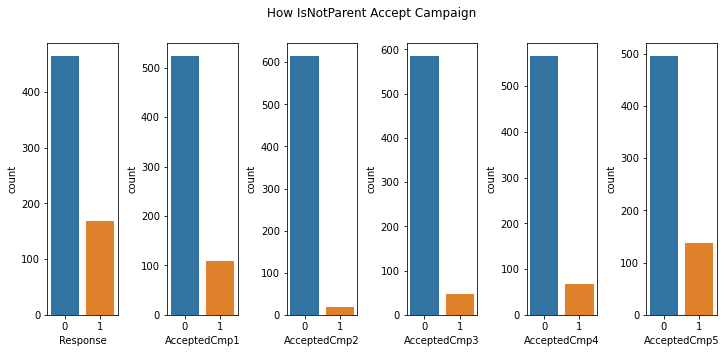

In [28]:
#Compare how not parent accept campaign
fig, axes = plt.subplots(1, 6, figsize=(12,5))
fig.suptitle('How IsNotParent Accept Campaign')

sns.countplot(ax=axes[0] , x='Response', data=df[df['IsParent']==0])
sns.countplot(ax=axes[1] , x='AcceptedCmp1', data=df[df['IsParent']==0])
sns.countplot(ax=axes[2] , x='AcceptedCmp2', data=df[df['IsParent']==0])
sns.countplot(ax=axes[3] , x='AcceptedCmp3', data=df[df['IsParent']==0])
sns.countplot(ax=axes[4] , x='AcceptedCmp4', data=df[df['IsParent']==0])
sns.countplot(ax=axes[5] , x='AcceptedCmp5', data=df[df['IsParent']==0])

plt.subplots_adjust(hspace = 0.8, wspace = 0.7)
plt.show

[Text(0.5, 1.0, 'Num Purchases by IsParent')]

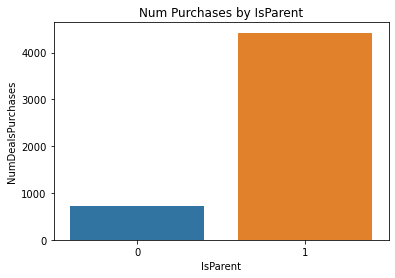

In [29]:
num_deals_par = pd.DataFrame(df.groupby('IsParent')['NumDealsPurchases'].sum())
num_deals_par = num_deals_par.reset_index()

sns.barplot(x='IsParent', y='NumDealsPurchases', data=num_deals_par).set(title='Num Purchases by IsParent')

Text(0.5, 1.0, 'Parent=1')

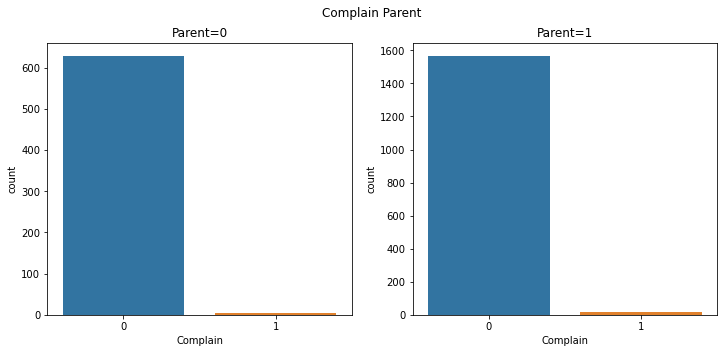

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Complain Parent')

sns.countplot(ax=axes[0] , x='Complain', data=df[df['IsParent']==0])
axes[0].set_title('Parent=0')

sns.countplot(ax=axes[1] , x='Complain', data=df[df['IsParent']==1])
axes[1].set_title('Parent=1')

### Encoding and Standardization

#### Encoding 

In [31]:
#list column to encode

cols = df._get_numeric_data().columns
cols_obj = set(df.columns) - set(cols)

print(list(cols_obj))

['Education', 'Marital_Status']


In [32]:
# from sklearn import preprocessing

In [33]:
le = preprocessing.LabelEncoder()

for i in cols_obj:
    df[i] = df[[i]].apply(le.fit_transform)
    
print(df[cols_obj].head(3))

   Education  Marital_Status
0          1               0
1          1               0
2          1               1


In [34]:
#check for each column type

print(df.dtypes.unique())

[dtype('int64') dtype('float64')]


#### Standardization 

In [35]:
#Take two columns for sample, which scaler is the best for standardization

s = pd.DataFrame(df[['Income', 'Kidhome']])
# print(s)

scaler_minmax = preprocessing.MinMaxScaler()
minmax = scaler_minmax.fit_transform(s)
minmax = pd.DataFrame(minmax, columns=['Income', 'Kidhome'])

scaler_standard = preprocessing.StandardScaler()
standard = scaler_standard.fit_transform(s)
standard = pd.DataFrame(standard, columns=['Income', 'Kidhome'])

scaler_robust = preprocessing.RobustScaler()
robust = scaler_robust.fit_transform(s)
robust = pd.DataFrame(robust, columns=['Income', 'Kidhome'])

<AxesSubplot:title={'center':'After robust Scaling'}, xlabel='Income', ylabel='Density'>

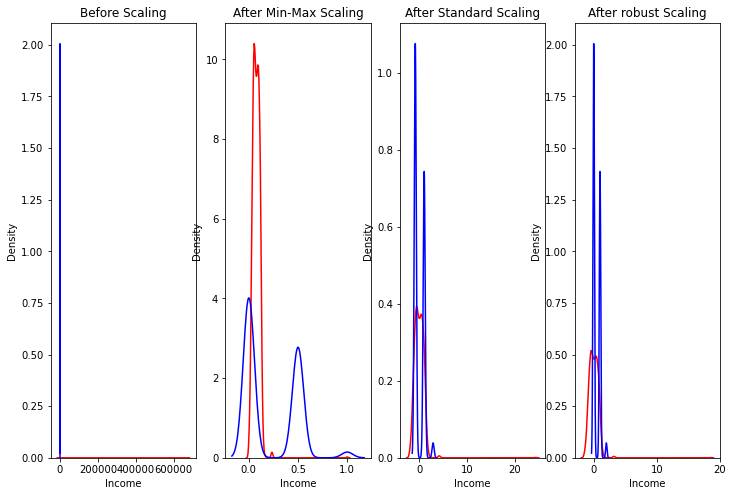

In [36]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize=(12,8))

ax1.set_title('Before Scaling')
sns.kdeplot(s['Income'], ax=ax1, color='r')
sns.kdeplot(s['Kidhome'], ax=ax1, color='b')

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(minmax['Income'], ax=ax2, color='r')
sns.kdeplot(minmax['Kidhome'], ax=ax2, color='b')

ax3.set_title('After Standard Scaling')
sns.kdeplot(standard['Income'], ax=ax3, color='r')
sns.kdeplot(standard['Kidhome'], ax=ax3, color='b')

ax4.set_title('After robust Scaling')
sns.kdeplot(robust['Income'], ax=ax4, color='r')
sns.kdeplot(robust['Kidhome'], ax=ax4, color='b')

In [37]:
#we use robust scaler from the comparison above

df_scale = df.copy()

cols = df_scale._get_numeric_data().columns
cols_exc = ['ID', 'Education', 'Marital_Status']

scale_cols = set(cols) - set(cols_exc)

for col in scale_cols:
    df_scale[col] = scaler_robust.fit_transform(df_scale[[col]])
    
print(df_scale.head(7))

     ID  Year_Birth  Education  Marital_Status    Income  Kidhome  Teenhome  \
0  5524   -0.722222          1               0  0.203393      0.0       0.0   
1  2174   -0.888889          1               0 -0.151645      1.0       1.0   
2  4141   -0.277778          1               1  0.609034      0.0       0.0   
3  6182    0.777778          1               1 -0.744619      1.0       0.0   
4  5324    0.611111          2               1  0.208059      1.0       0.0   
5  7446   -0.166667          2               1  0.335094      0.0       1.0   
6   965    0.055556          1               0  0.128044      0.0       1.0   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     0.18  0.957380   2.580645         2.210405         3.404255   
1    -0.22 -0.339917  -0.225806        -0.286705        -0.212766   
2    -0.46  0.522869   1.322581         0.272832         2.106383   
3    -0.46 -0.339917  -0.129032        -0.221965        -0.042553   
4     0.90 -0.003119  

### Clustering 

In [38]:
# from sklearn.cluster import KMeans

df_scale_km = df_scale.copy()

cols1 = df_scale.columns
cols_exc1 = ['ID']
scale_km_cols = set(cols1) - set(cols_exc1)

x1 = df_scale_km[scale_km_cols]
# x1.columns
# x1.mean()
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)

/opt/conda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn("algorithm='elkan' doesn't make sense for a single "


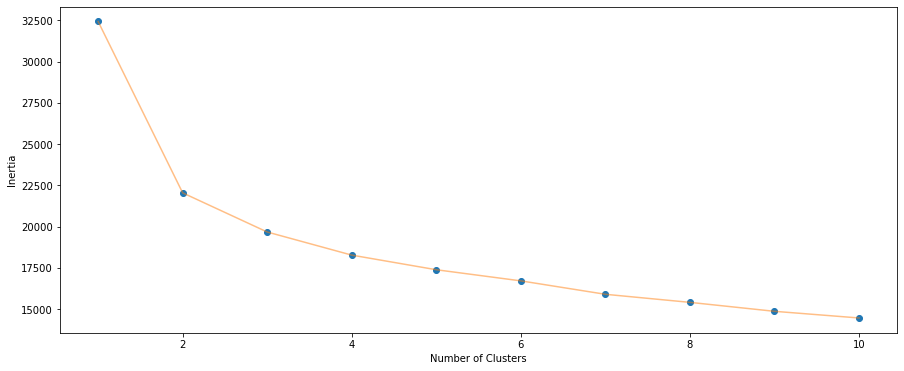

In [39]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [40]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(x1)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

#add columns that contains the cluster label
df['Cluster'] = labels
df.head(7)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,IsParent,CntMnt,Cluster
0,5524,1957,1,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,0,0,1441,1
1,2174,1954,1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,2,1,20,2
2,4141,1965,1,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,0,0,713,1
3,6182,1984,1,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,1,1,45,2
4,5324,1981,2,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,1,1,380,0
5,7446,1967,2,1,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,55,1,1,660,0
6,965,1971,1,0,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,51,1,1,514,0


### Customer Profiling 

In [41]:
#Customer profile from their income

pd.pivot_table(data=df, index=['Cluster'], values='Income')

,Income
Cluster,
0,59748.627608
1,75213.585106
2,35117.640428


In [42]:
cust_info = ['Age', 'Children', 'Education', 'Income']

pd.pivot_table(data=df, index=['Cluster', 'IsParent'], values=cust_info)

Age  Children  Education        Income
Cluster IsParent                                              
0       0         57.551724  0.000000   1.597701  61766.988506
        1         56.970149  1.257463   1.529851  59421.020522
1       0         53.437647  0.000000   1.458824  76807.825882
        1         53.762590  1.064748   1.302158  70339.107914
2       0         50.363636  0.000000   1.264463  29541.892562
        1         50.688326  1.406388   1.426211  35860.664097

<Figure size 432x288 with 0 Axes>

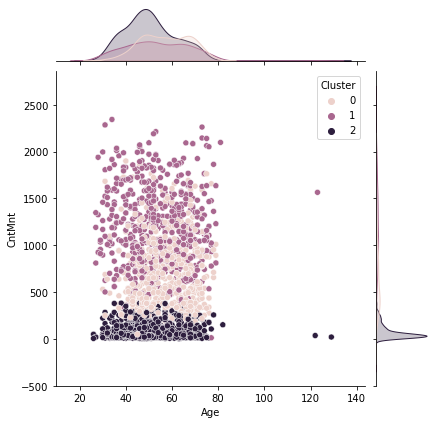

<Figure size 432x288 with 0 Axes>

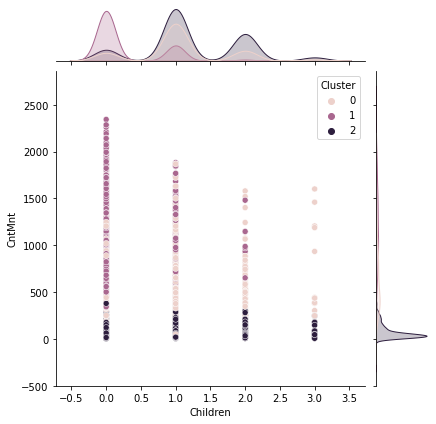

<Figure size 432x288 with 0 Axes>

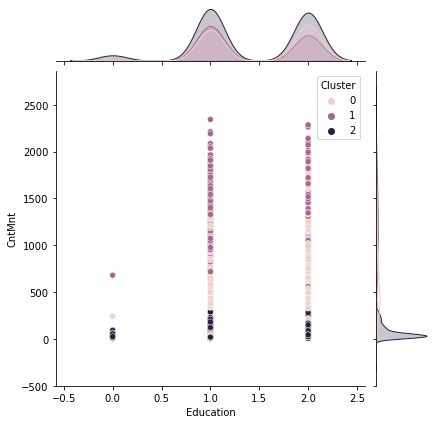

<Figure size 432x288 with 0 Axes>

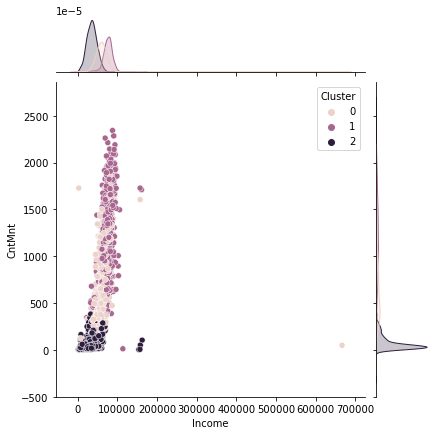

In [52]:
for i in cust_info:
    plt.figure()
    sns.jointplot(x=df[i], y=df['CntMnt'], hue=df['Cluster'])
    plt.show()

In [43]:
cnt = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

pd.pivot_table(data=df, index=['Cluster', 'IsParent'], values=cnt)

MntFishProducts  MntFruits  MntGoldProds  MntMeatProducts  \
Cluster IsParent                                                              
0       0               35.287356  21.942529     53.540230       209.057471   
        1               26.658582  19.264925     61.106343       139.393657   
1       0              103.823529  70.847059     79.157647       502.891765   
        1              110.388489  81.258993     84.971223       290.647482   
2       0               10.785124   8.851240     19.512397        23.479339   
        1                5.806167   4.068282     13.438326        22.235683   

                  MntSweetProducts    MntWines  
Cluster IsParent                                
0       0                20.183908  585.298851  
        1                19.167910  468.468284  
1       0                72.630588  596.828235  
        1                86.899281  540.726619  
2       0                 8.586777   36.173554  
        1                 4.273128   45.014317

<Figure size 432x288 with 0 Axes>

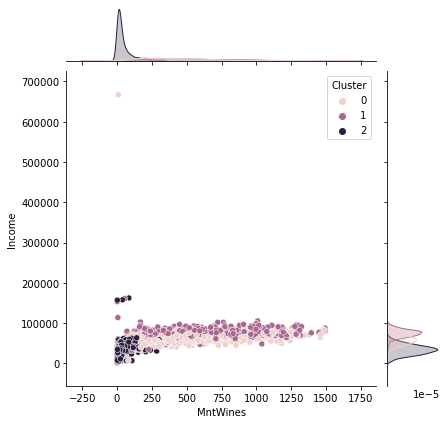

<Figure size 432x288 with 0 Axes>

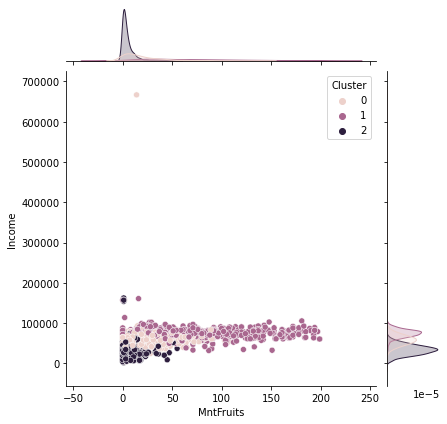

<Figure size 432x288 with 0 Axes>

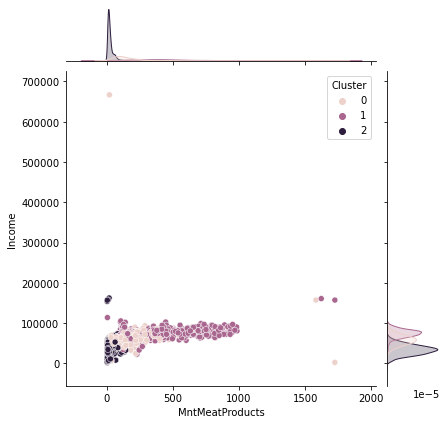

<Figure size 432x288 with 0 Axes>

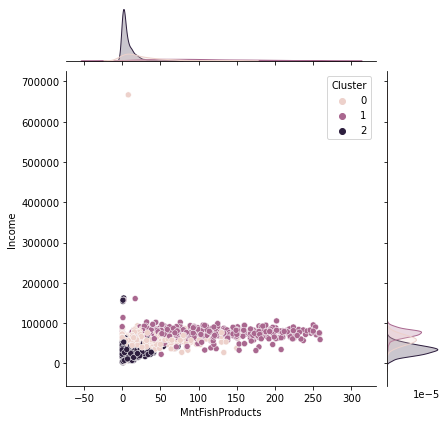

<Figure size 432x288 with 0 Axes>

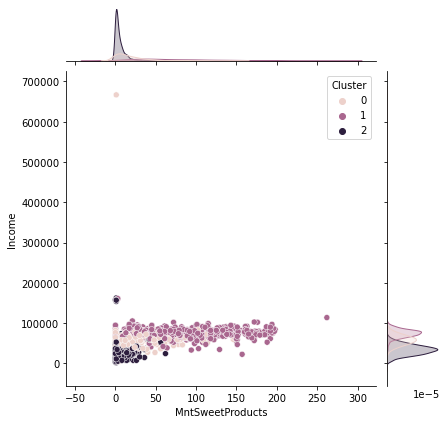

<Figure size 432x288 with 0 Axes>

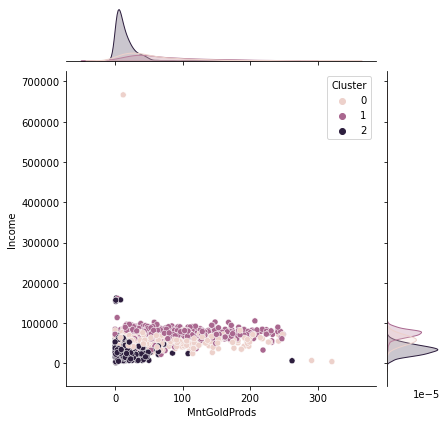

In [54]:
for j in cnt:
    plt.figure()
    sns.jointplot(x=df[j], y=df['Income'], hue=df['Cluster'])
    plt.show()

In [44]:
purchase = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

pd.pivot_table(data=df, index=['Cluster', 'IsParent'], values=purchase)

NumCatalogPurchases  NumStorePurchases  NumWebPurchases  \
Cluster IsParent                                                            
0       0                    4.091954           7.574713         5.218391   
        1                    3.203358           7.600746         6.255597   
1       0                    6.091765           8.338824         4.960000   
        1                    5.129496           8.985612         6.906475   
2       0                    0.611570           3.272727         1.876033   
        1                    0.517621           3.230176         2.148678   

                  NumWebVisitsMonth  
Cluster IsParent                     
0       0                  4.045977  
        1                  5.744403  
1       0                  2.571765  
        1                  4.568345  
2       0                  6.330579  
        1                  6.455947

<Figure size 432x288 with 0 Axes>

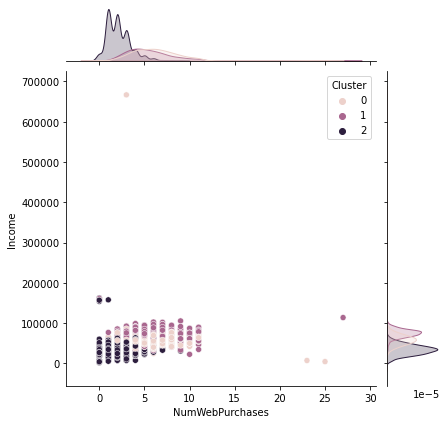

<Figure size 432x288 with 0 Axes>

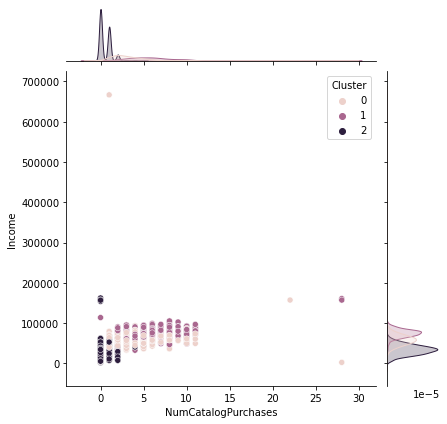

<Figure size 432x288 with 0 Axes>

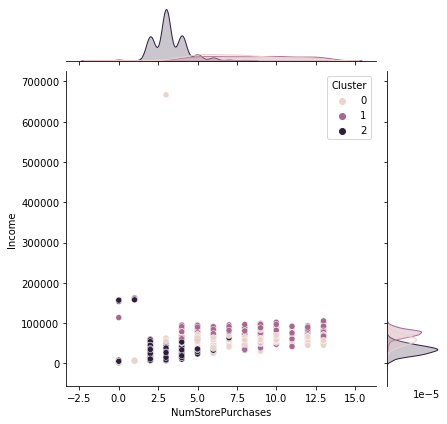

<Figure size 432x288 with 0 Axes>

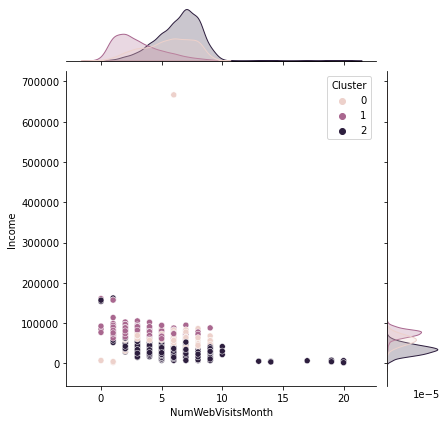

In [57]:
for k in purchase:
    plt.figure()
    sns.jointplot(x=df[k], y=df['Income'], hue=df['Cluster'])
    plt.show()

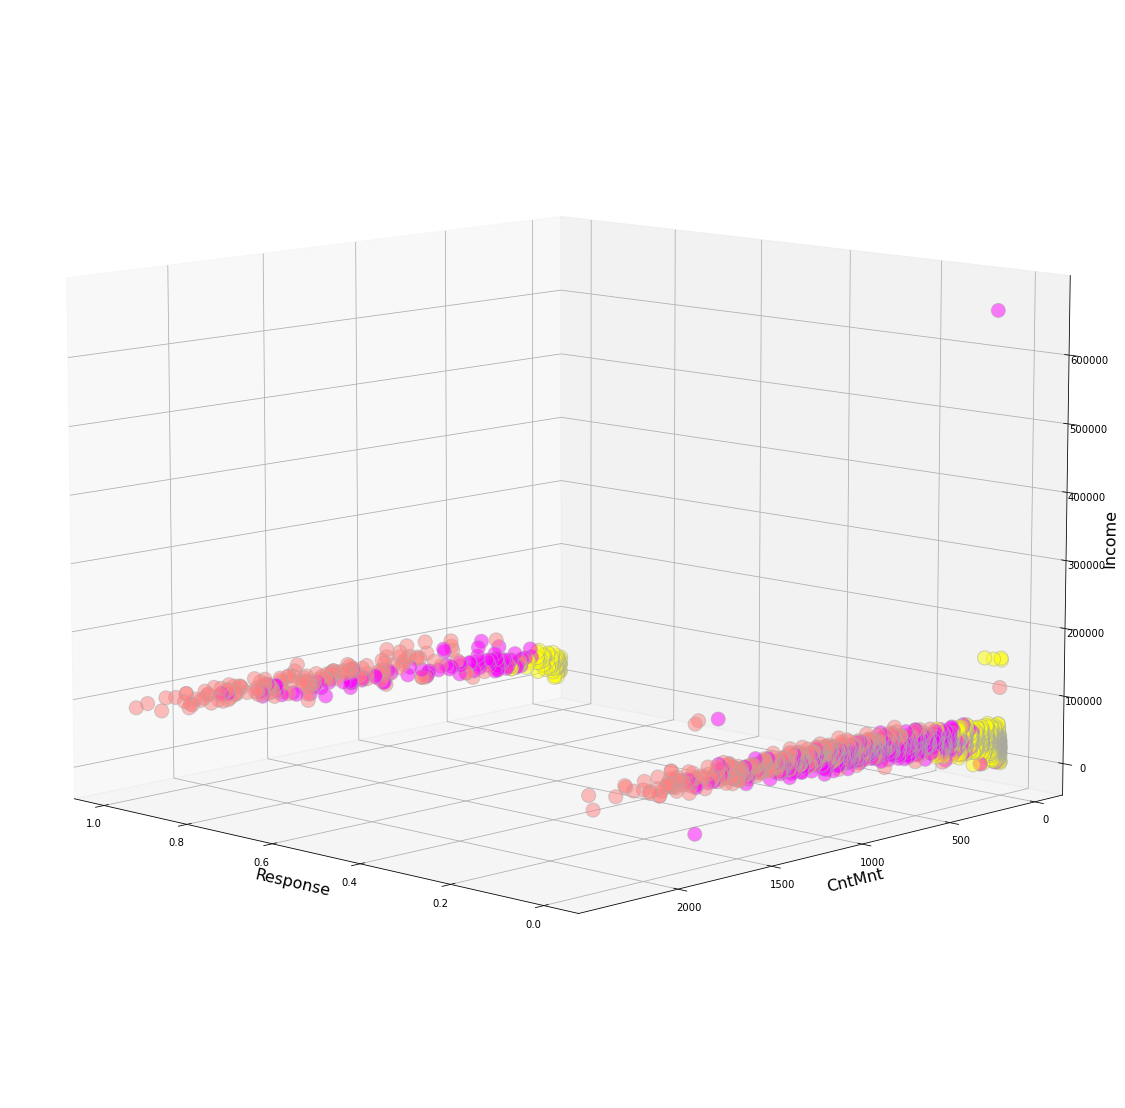

In [45]:
#Cust profiling

fig = plt.figure(figsize=(16,20))
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 10, 
            azim = 134)

plt.cla()
ax.scatter(df['Response'], df['CntMnt'], df['Income'], 
           c = df['Cluster'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Response', 
              fontsize = 16)
ax.set_ylabel('CntMnt', 
              fontsize = 16)
ax.set_zlabel('Income', 
              fontsize = 16)

# plt.savefig('3d_plot.png')
plt.show()

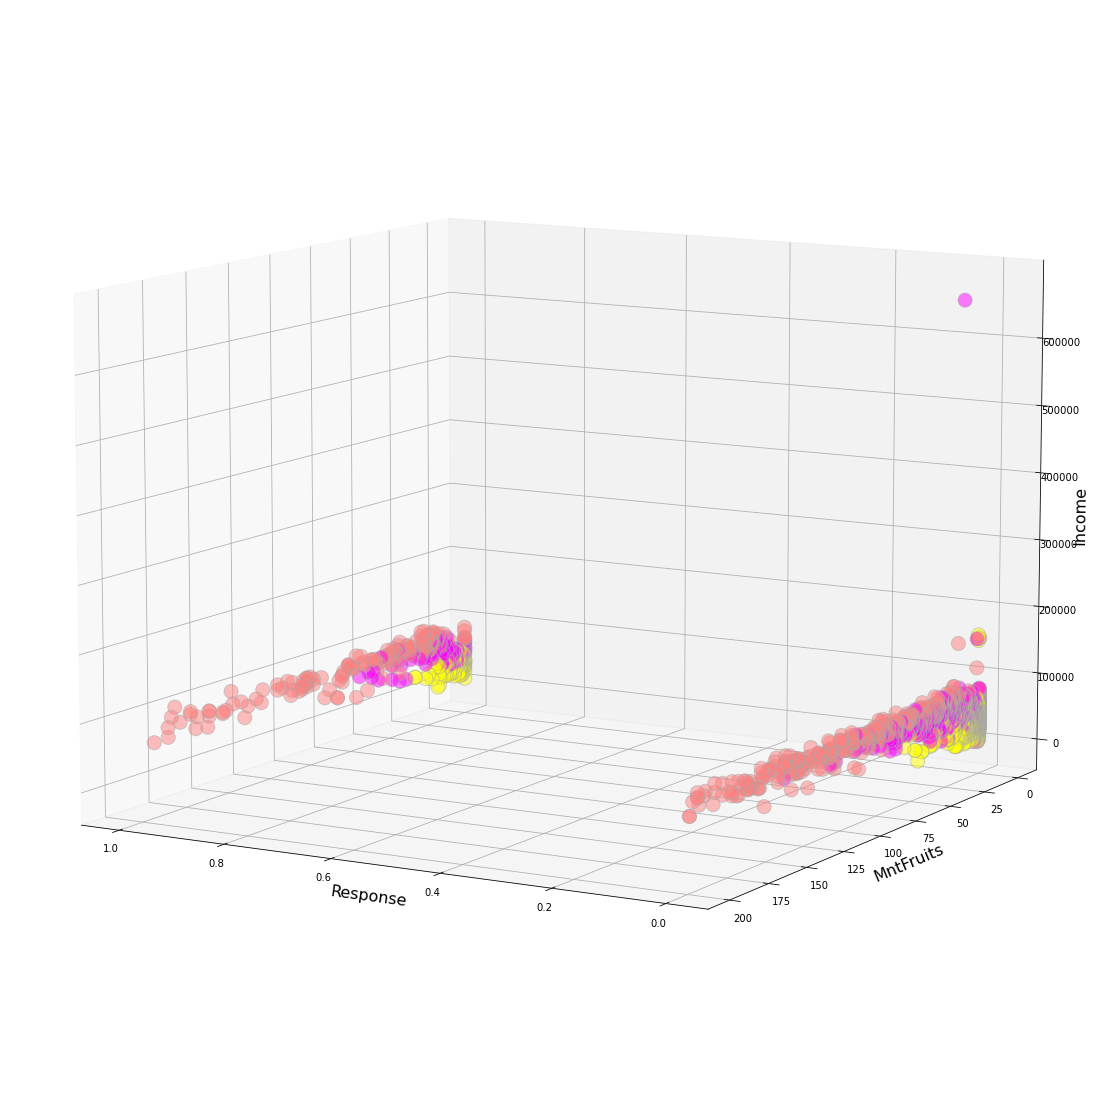

In [46]:
fig = plt.figure(figsize=(16,20))
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 10, 
            azim = 120)

plt.cla()
ax.scatter(df['Response'], df['MntFruits'], df['Income'], 
           c = df['Cluster'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Response', 
              fontsize = 16)
ax.set_ylabel('MntFruits', 
              fontsize = 16)
ax.set_zlabel('Income', 
              fontsize = 16)

# plt.savefig('3d_plot.png')
plt.show()

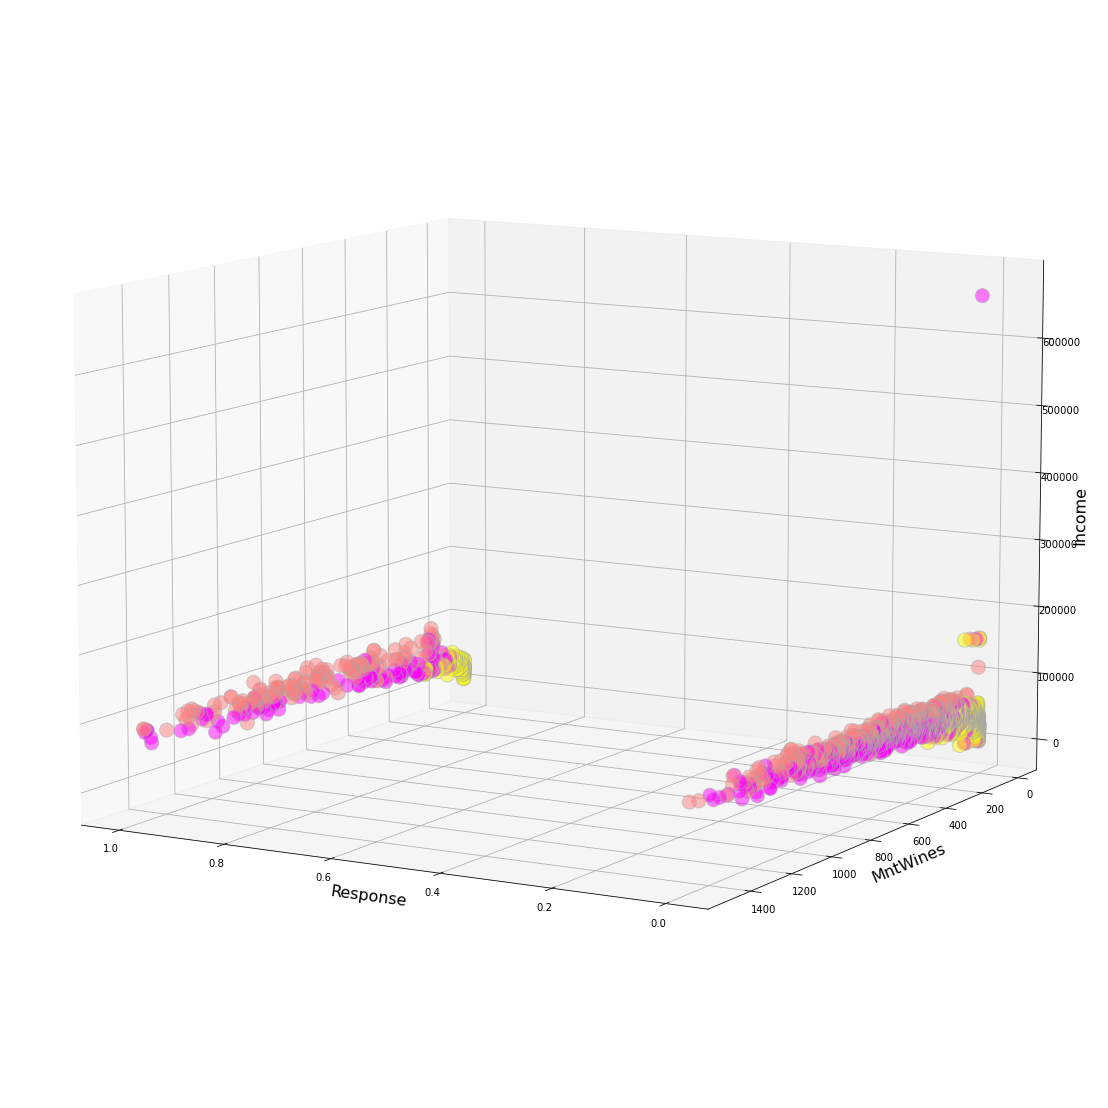

In [47]:
fig = plt.figure(figsize=(16,20))
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 10, 
            azim = 120)

plt.cla()
ax.scatter(df['Response'], df['MntWines'], df['Income'], 
           c = df['Cluster'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Response', 
              fontsize = 16)
ax.set_ylabel('MntWines', 
              fontsize = 16)
ax.set_zlabel('Income', 
              fontsize = 16)

# plt.savefig('3d_plot.png')
plt.show()

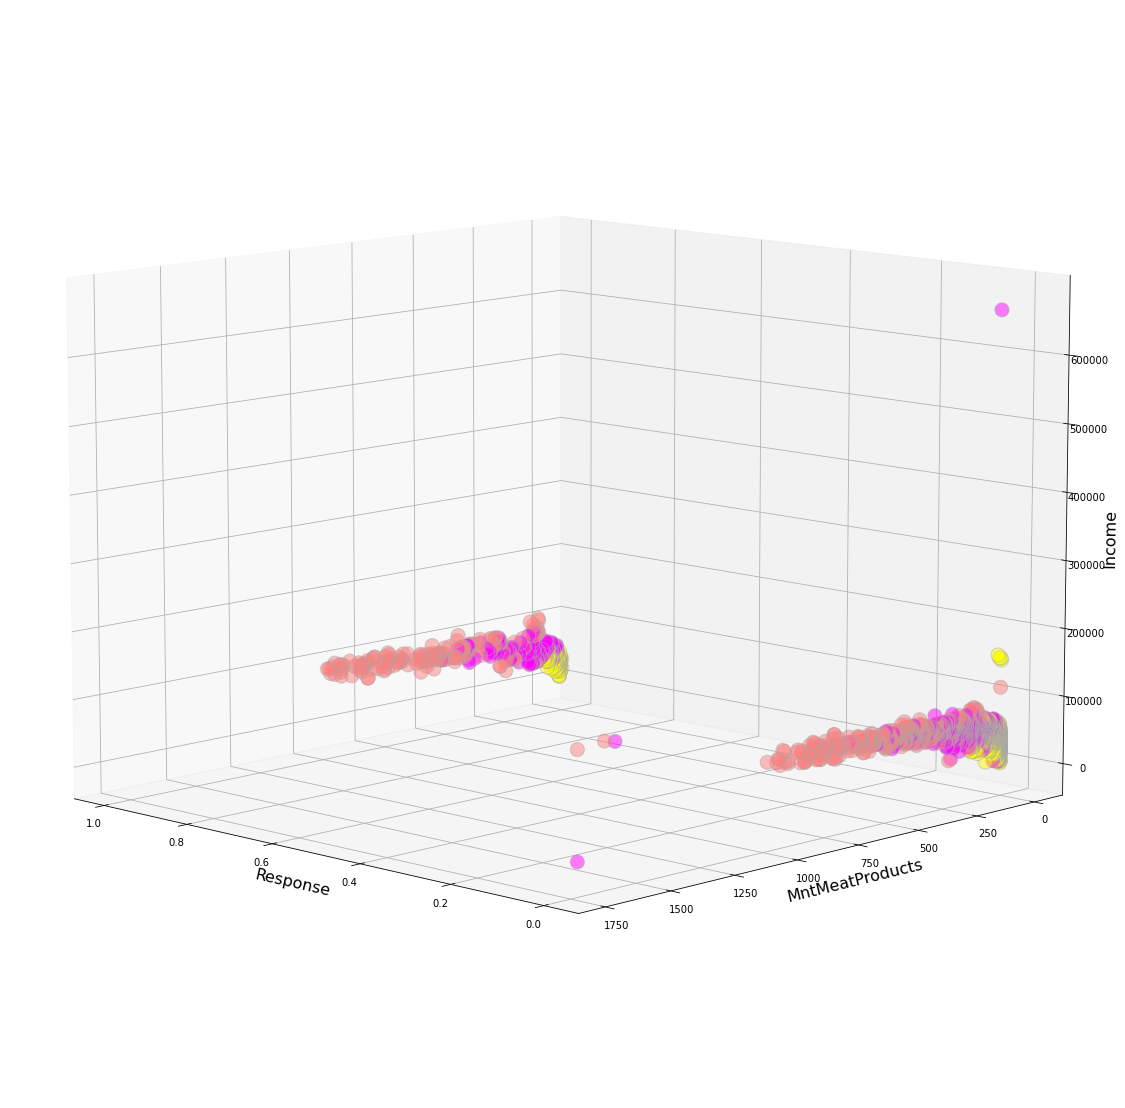

In [48]:
fig = plt.figure(figsize=(16,20))
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 10, 
            azim = 134)

plt.cla()
ax.scatter(df['Response'], df['MntMeatProducts'], df['Income'], 
           c = df['Cluster'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Response', 
              fontsize = 16)
ax.set_ylabel('MntMeatProducts', 
              fontsize = 16)
ax.set_zlabel('Income', 
              fontsize = 16)

# plt.savefig('3d_plot.png')
plt.show()

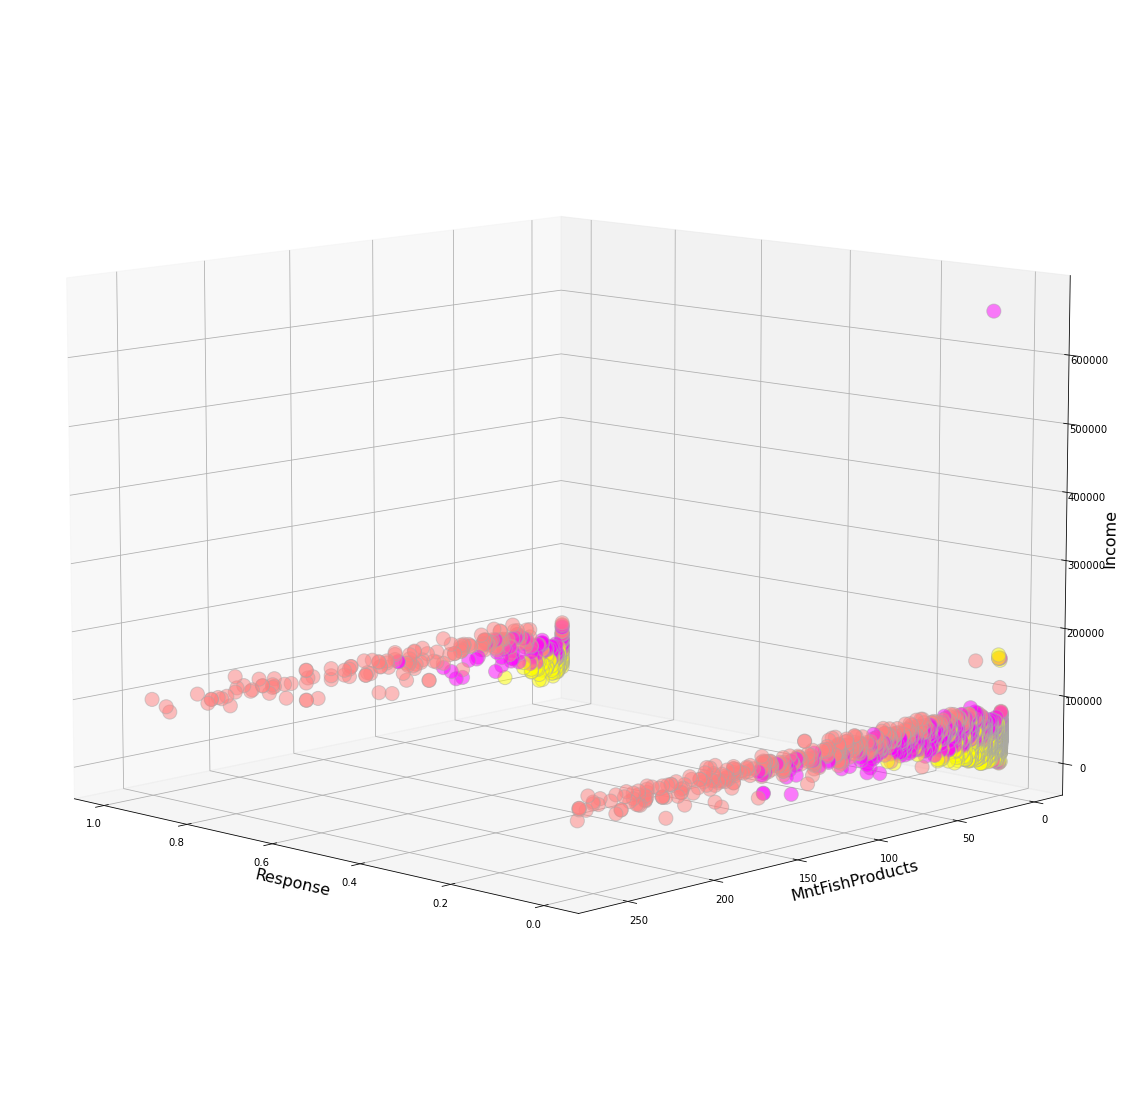

In [49]:
fig = plt.figure(figsize=(16,20))
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 10, 
            azim = 134)

plt.cla()
ax.scatter(df['Response'], df['MntFishProducts'], df['Income'], 
           c = df['Cluster'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Response', 
              fontsize = 16)
ax.set_ylabel('MntFishProducts', 
              fontsize = 16)
ax.set_zlabel('Income', 
              fontsize = 16)

# plt.savefig('3d_plot.png')
plt.show()

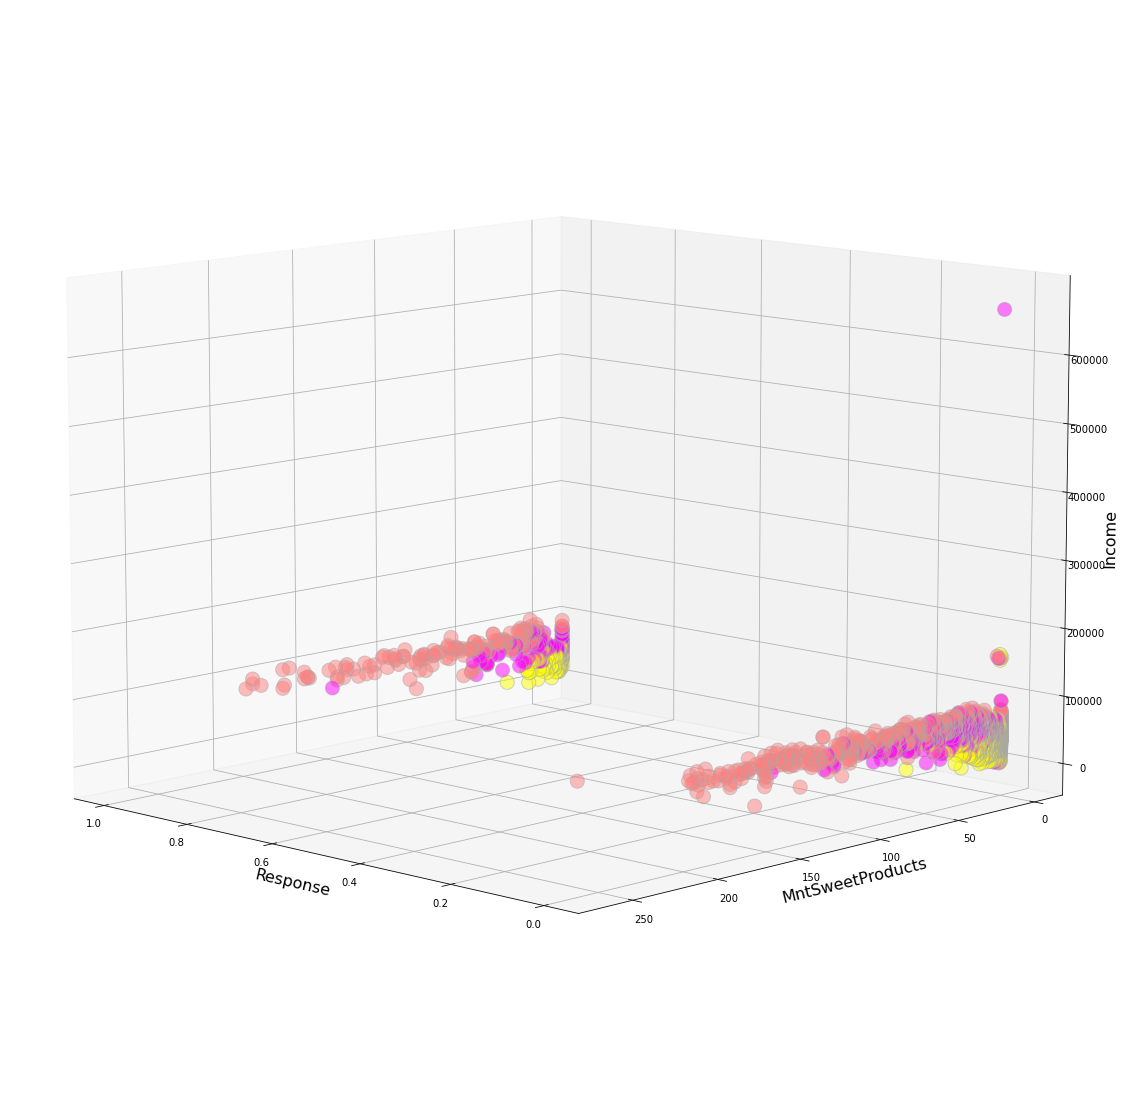

In [50]:
fig = plt.figure(figsize=(16,20))
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 10, 
            azim = 134)

plt.cla()
ax.scatter(df['Response'], df['MntSweetProducts'], df['Income'], 
           c = df['Cluster'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Response', 
              fontsize = 16)
ax.set_ylabel('MntSweetProducts', 
              fontsize = 16)
ax.set_zlabel('Income', 
              fontsize = 16)

# plt.savefig('3d_plot.png')
plt.show()

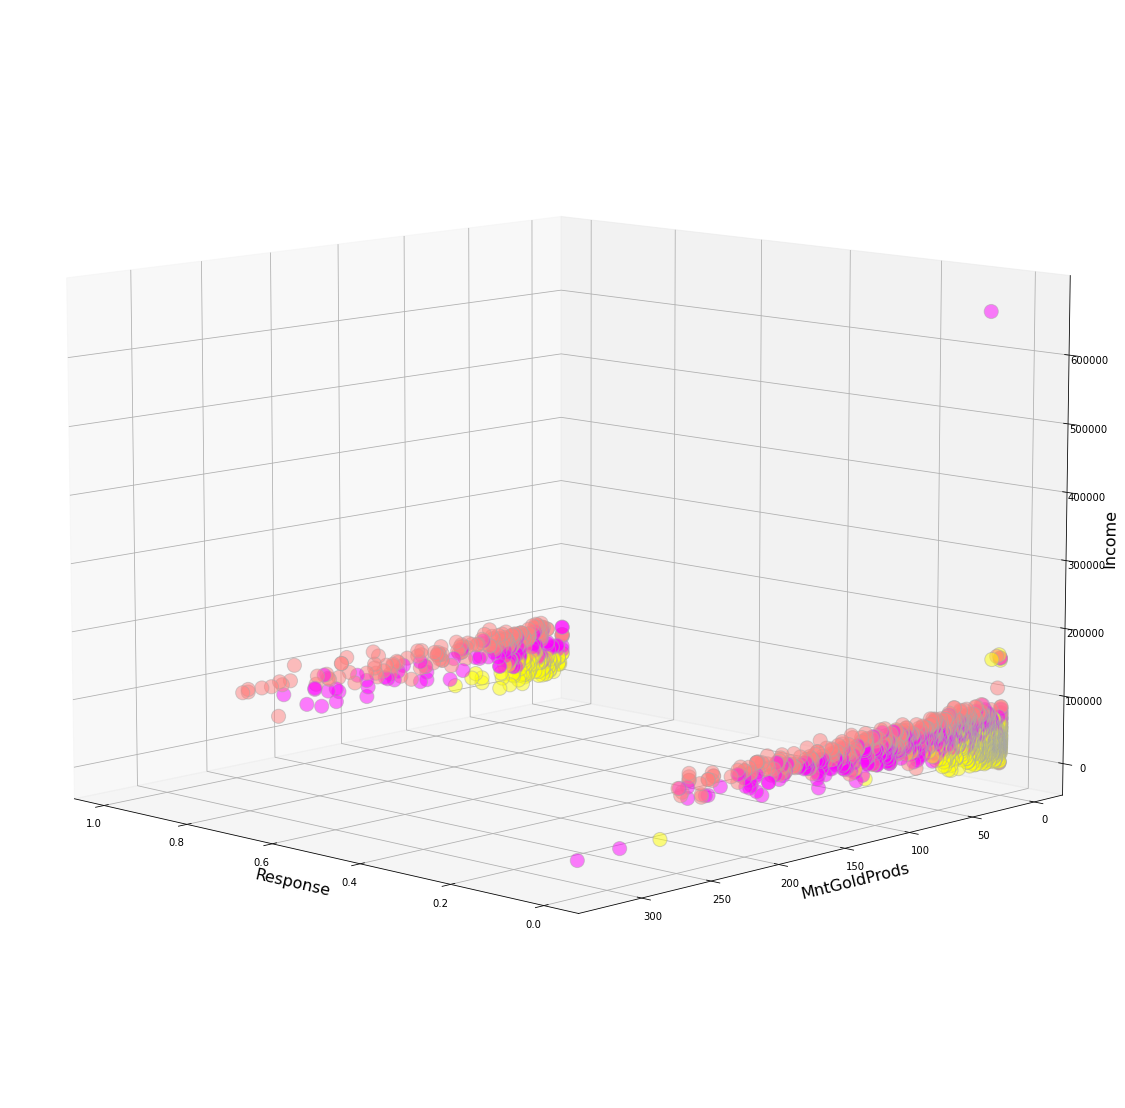

In [51]:
fig = plt.figure(figsize=(16,20))
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 10, 
            azim = 134)

plt.cla()
ax.scatter(df['Response'], df['MntGoldProds'], df['Income'], 
           c = df['Cluster'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Response', 
              fontsize = 16)
ax.set_ylabel('MntGoldProds', 
              fontsize = 16)
ax.set_zlabel('Income', 
              fontsize = 16)

# plt.savefig('3d_plot.png')
plt.show()